## Clone the Repository

In [4]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1515, done.
remote: Counting objects: 100% (523/523), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 1515 (delta 416), reused 357 (delta 339), pack-reused 992 (from 3)
Receiving objects: 100% (1515/1515), 13.05 MiB | 20.84 MiB/s, done.
Resolving deltas: 100% (1019/1019), done.


In [5]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [6]:
# Install the Requirements
# !pip install -r requirements.txt

## Download the Dataset

Here we are using the [Aquarium Dataset](https://public.roboflow.com/object-detection/aquarium) from Roboflow.

Download the unzip the dataset to `custom_data` directory.

In [23]:
!curl -L "https://public.roboflow.com/ds/CNyGy97q45?key=eSpwiC1Ah7" > roboflow.zip; unzip roboflow.zip -d custom_data; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   900  100   900    0     0   2949      0 --:--:-- --:--:-- --:--:--  2941
100 68.0M  100 68.0M    0     0  36.6M      0  0:00:01  0:00:01 --:--:-- 80.3M
Archive:  roboflow.zip
replace custom_data/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


## Create the Custom Dataset YAML File.

In [8]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'custom_data/train'
TRAIN_DIR_LABELS: 'custom_data/train'
VALID_DIR_IMAGES: 'custom_data/valid'
VALID_DIR_LABELS: 'custom_data/valid'

# Class names.
CLASSES: [
    '__background__',
    'fish', 'jellyfish', 'penguin',
    'shark', 'puffin', 'stingray',
    'starfish'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 8

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


In [9]:
!pip install albumentations

In [10]:
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121


In [20]:
!pip install albumentations opencv-python


In [11]:
!pip install numpy opencv-python


In [12]:
ls /content/fastercnn-pytorch-training-pipeline/utils/


annotations.py  general.py  __init__.py  logging.py  transforms.py  validate.py


In [13]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), "fastercnn-pytorch-training-pipeline"))

In [16]:
!pip install vision-transformers


  Preparing metadata (setup.py) ... done
  Created wheel for vision-transformers: filename=vision_transformers-0.1.1.0-py3-none-any.whl size=48416 sha256=96ea23d93ed667e13ec05d6a21965f961f138ccb6593e0ca61e3e886fc985a6f
  Stored in directory: /root/.cache/pip/wheels/a5/e1/ac/9fd63b516dba2c1433168132a6f1e938486df40b97fe3e2d28
Successfully built vision-transformers


In [18]:
!pip install torchinfo


## Training

In [22]:
!python train.py --data data_configs/custom_data.yaml --epochs 2 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 1

2025-10-13 09:03:19.209313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760346199.246073   17279 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760346199.256879   17279 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760346199.283063   17279 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760346199.283111   17279 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760346199.283120   17279 computation_placer.cc:177] computation placer alr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Visualize Validation Results

In [24]:
import matplotlib.pyplot as plt
import glob as glob

Found 1 validation images.
['/content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training/image_0_1.jpg']


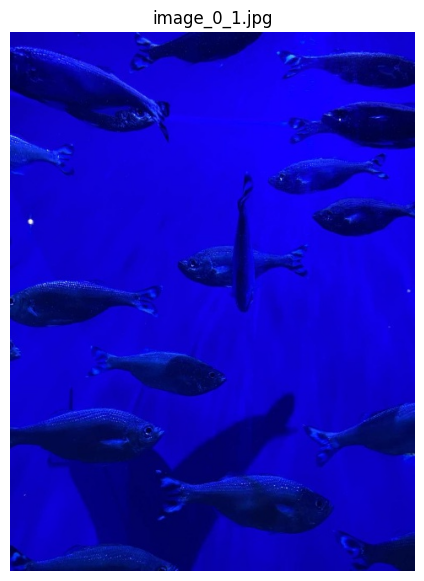

In [26]:
import glob
import os

results_dir_path = '/content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

print(f"Found {len(valid_images)} validation images.")
print(valid_images[:5])  # show first few paths

if len(valid_images) == 0:
    print("⚠️ No .jpg images found — check your output folder path or image extension.")
else:
    for i in range(min(3, len(valid_images))):  # avoid index error
        plt.figure(figsize=(10, 7))
        image = plt.imread(valid_images[i])
        plt.imshow(image)
        plt.axis('off')
        plt.title(os.path.basename(valid_images[i]))
        plt.show()


Check Out the Repo for Latest Updates
https://github.com/sovit-123/fastercnn-pytorch-training-pipeline

## Evaluation

In [28]:
!pip install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 24.4 MB/s eta 0:00:00


In [29]:
# No verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

2025-10-13 09:18:06.730894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760347086.751449   21011 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760347086.757738   21011 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760347086.772946   21011 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760347086.772970   21011 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760347086.772974   21011 computation_placer.cc:177] computation placer alr

In [33]:
!python inference.py --input /content/fastercnn-pytorch-training-pipeline/custom_data/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg --weights outputs/training/custom_training/best_model.pth

2025-10-13 09:21:48.740861: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760347308.760775   22093 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760347308.766708   22093 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760347308.783160   22093 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760347308.783184   22093 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760347308.783189   22093 computation_placer.cc:177] computation placer alr